## LESCO Distance-Based Evaluation

In [8]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import spatial # cosine similarity
import pandas as pd
from scipy.spatial import distance
import ast

In [9]:
# load all pre-proceesed videos.
videos = []
with open("videos.csv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for i, line in enumerate(reader):
        x = line[0]
        if(x != ''):
            video = [float(c) for c in x.replace('"','').replace('[','').replace(']','').replace(' ','').split(',')]
            videos.append(video)
        else:
            videos.append([])
        
labels = []
with open("labels.csv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for i, line in enumerate(reader):
        labels = [x.replace("'","").replace('"',"") for x in line[0].split(',')]

clean_videos = []
clean_labels = []
# remove wrongly loaded videos
for vid, lab in zip(videos, labels):
    if (vid):
        clean_videos.append(vid)
        clean_labels.append(lab)
        
videos = clean_videos
labels = clean_labels

In [10]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.20, random_state=43)

print("Training", len(X_train))
print("Training", len(X_test))

Training 523
Training 131


In [4]:
len(videos)

654

Text(0.5, 1.0, 'Fire')

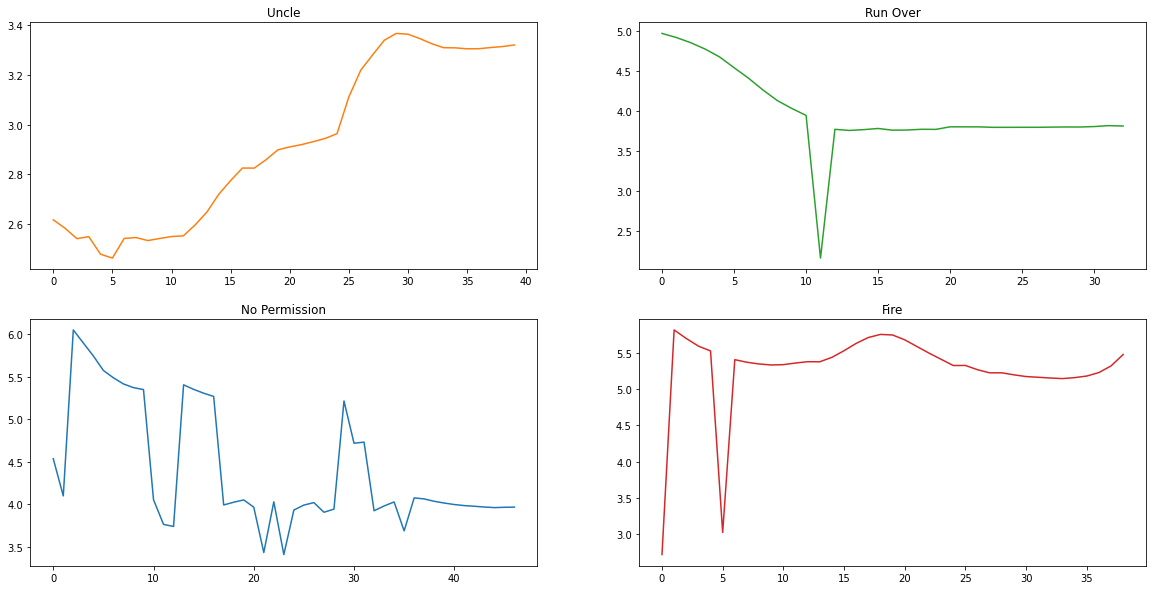

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

axs[0, 0].plot(X_train[20], 'tab:orange')
axs[0, 0].set_title("Uncle")

axs[0, 1].plot(X_train[40], 'tab:green')
axs[0, 1].set_title("Run Over")

axs[1, 0].plot(X_train[120], 'tab:blue')
axs[1, 0].set_title("No Permission")

axs[1, 1].plot(X_train[320], 'tab:red')
axs[1, 1].set_title("Fire")


## Similarity Functions

In [6]:
def get_cosine(train_data, test_item, padding = 50):
    similarity = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s = 1 - spatial.distance.cosine(data, test_item)
        similarity.append(s)
        
    
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity
    })
    
    df = df.sort_values(by=['similarity'], ascending=False)
    
    return df.iloc[0]["y_train"]  # returns most similar class


def get_cosine_knn(train_data, test_item, k = 2, padding = 50):
    similarity = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s = 1 - spatial.distance.cosine(data, test_item)
        similarity.append(s)
        
    
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity
    })
    
    df = df.sort_values(by=['similarity'], ascending=False)
    
    return df["y_train"]


def get_euclidean(train_data, test_item, padding = 50):
    similarity = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s = 1 - np.linalg.norm(np.array(data) - np.array(test_item))
        similarity.append(s)
        
    
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity
    })
    
    df = df.sort_values(by=['similarity'], ascending=False)
    
    return df.iloc[0]["y_train"]  # returns most similar class


def get_manhattan(train_data, test_item, padding = 50):
    similarity = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s = 1 - np.abs(np.array(data) - np.array(test_item)).sum()
        similarity.append(s)
        
    
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity
    })
    
    df = df.sort_values(by=['similarity'], ascending=False)
    
    return df.iloc[0]["y_train"]  # returns most similar class

def get_dotproduct(train_data, test_item, padding = 50):
    similarity = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s = np.dot(np.array(data), np.array(test_item))
        similarity.append(s)
        
    
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity
    })
    
    df = df.sort_values(by=['similarity'], ascending=True)
    
    return df.iloc[0]["y_train"]  # returns most similar class

def get_chebyshev(train_data, test_item, padding = 50):
    similarity = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s =  1 - distance.chebyshev(np.array(data), np.array(test_item))
        similarity.append(s)
        
    
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity
    })
    
    df = df.sort_values(by=['similarity'], ascending=False)
    
    return df.iloc[0]["y_train"]  # returns most similar class

def get_minkowski(train_data, test_item, padding = 50):
    similarity = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s =  1 - distance.minkowski(np.array(data), np.array(test_item))
        similarity.append(s)
        
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity
    })
    
    df = df.sort_values(by=['similarity'], ascending=False)
    
    return df.iloc[0]["y_train"]  # returns most similar class


# test
# get_cosine(X_train, X_test[0])     

## Test Set Validation

In [14]:
# normal cosine

total = len(X_test)
count = 0

for test, label in zip(X_test, y_test):
    y_pred = get_cosine(X_train, test)
    if (y_pred == label):
        count = count + 1

print("Cosine Normal Fn Test Set Accuracy:", round(count/total,2))
    

Cosine Normal Fn Test Set Accuracy: 0.79


In [15]:
# cosine knn mix

def most_common(lst):
    return max(set(lst), key=lst.count)

total = len(X_test)
count = 0

for test, label in zip(X_test, y_test):
    y_pred = most_common(get_cosine_knn(X_train, test).iloc[:10].to_list())
    if (y_pred == label):
        count = count + 1

print("Cosine KNN Fn Test Set Accuracy:", round(count/total,2))


Cosine KNN Fn Test Set Accuracy: 0.31


In [16]:
total = len(X_test)
count = 0

for test, label in zip(X_test, y_test):
    y_pred = get_euclidean(X_train, test)
    if (y_pred == label):
        count = count + 1

print("Euclidean Normal Fn Test Set Accuracy:", round(count/total,2))

Euclidean Normal Fn Test Set Accuracy: 0.82


In [17]:
total = len(X_test)
count = 0

for test, label in zip(X_test, y_test):
    y_pred = get_manhattan(X_train, test)
    if (y_pred == label):
        count = count + 1

print("Manhattan Normal Fn Test Set Accuracy:", round(count/total,2))

Manhattan Normal Fn Test Set Accuracy: 0.92


In [18]:
total = len(X_test)
count = 0

for test, label in zip(X_test, y_test):
    y_pred = get_dotproduct(X_train, test)
    if (y_pred == label):
        count = count + 1

print("Dot Product Fn Test Set Accuracy:", round(count/total,2))

Dot Product Fn Test Set Accuracy: 0.01


In [19]:
total = len(X_test)
count = 0

for test, label in zip(X_test, y_test):
    y_pred = get_chebyshev(X_train, test)
    if (y_pred == label):
        count = count + 1

print("Chebyshev Fn Test Set Accuracy:", round(count/total,2))

Chebyshev Fn Test Set Accuracy: 0.58


In [20]:
total = len(X_test)
count = 0

for test, label in zip(X_test, y_test):
    y_pred = get_minkowski(X_train, test)
    if (y_pred == label):
        count = count + 1

print("Minkowski Fn Test Set Accuracy:", round(count/total,2))

Minkowski Fn Test Set Accuracy: 0.82


## Cross Validation Manhattan
cross validation shows that Manhattan is the best similarity measure so far...

In [7]:
scores = []
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.20)
    total = len(X_test)
    count = 0
    for test, label in zip(X_test, y_test):
        y_pred = get_manhattan(X_train, test)
        if (y_pred == label):
            count = count + 1
    scores.append(round(count/total,2))
print("Scores:", scores)
print("Manhattan Cross Validation", np.mean(scores))
    

Scores: [0.87, 0.95, 0.96, 0.88, 0.96]
Manhattan Cross Validation 0.9239999999999998


In [ ]:
# Manhattan Cross Validated Accuracy 92% wooow!

In [23]:
scores = []
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.20)
    total = len(X_test)
    count = 0
    for test, label in zip(X_test, y_test):
        y_pred = get_cosine(X_train, test)
        if (y_pred == label):
            count = count + 1
    scores.append(round(count/total,2))
print("Scores:", scores)
print("Cosine Cross Validation", np.mean(scores))

Scores: [0.79, 0.84, 0.78, 0.78, 0.8]
Cosine Cross Validation 0.798


In [24]:
scores = []
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.20)
    total = len(X_test)
    count = 0
    for test, label in zip(X_test, y_test):
        y_pred = get_euclidean(X_train, test)
        if (y_pred == label):
            count = count + 1
    scores.append(round(count/total,2))
print("Scores:", scores)
print("Euclidean Cross Validation", np.mean(scores))

Scores: [0.79, 0.78, 0.82, 0.88, 0.81]
Euclidean Cross Validation 0.8160000000000001
